In [13]:
# Read data from csv into R
Data <- read.csv(file="temp_history.csv", header=TRUE, sep=",")

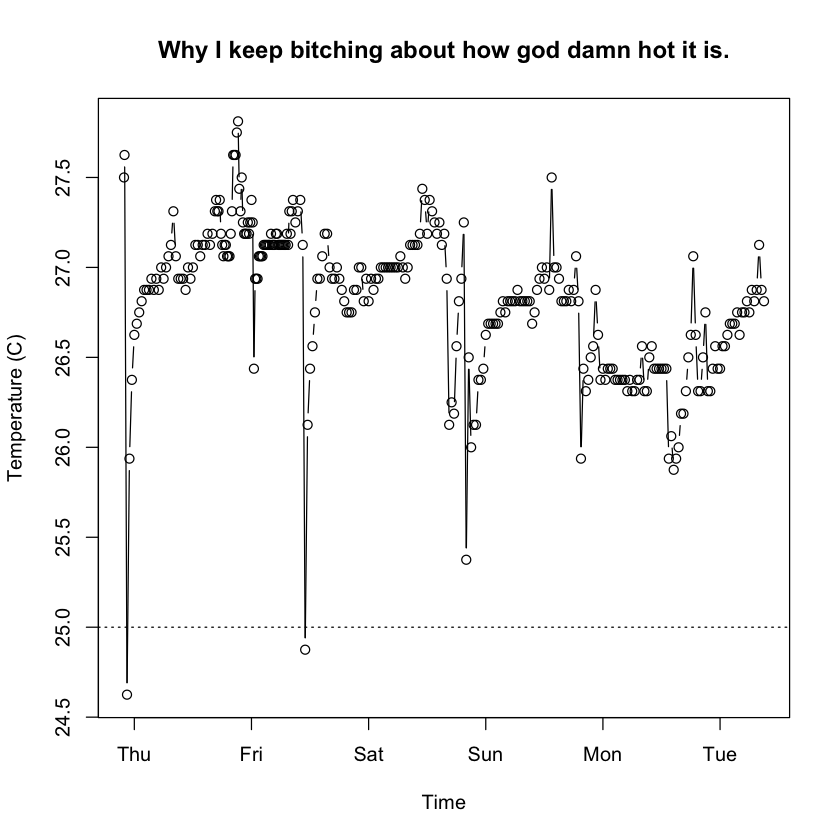

In [14]:
plot(strptime(Data$timestamp, format="%c"), Data$temperature-2.5, xlab="Time", ylab="Temperature (C)", main="Why I keep bitching about how god damn hot it is.")
lines(strptime(Data$timestamp, format="%c"), Data$temperature-2.5, type="c")
#lines(strptime(Data$timestamp, format="%c"), Data$external_temperature, type="c")
abline(h=25, lty="dotted")

In [3]:
png("temperature.png")
plot(strptime(Data$timestamp, format="%c"), Data$temperature, xlab="Time", ylab="Temperature (C)", main="How hot is it? (as a function of time)")
lines(strptime(Data$timestamp, format="%c"), Data$temperature, type="c")
dev.off()

pdf 
  2

In [11]:
DataFull <- read.csv(file="temperature_data.csv", header=TRUE, sep=",")

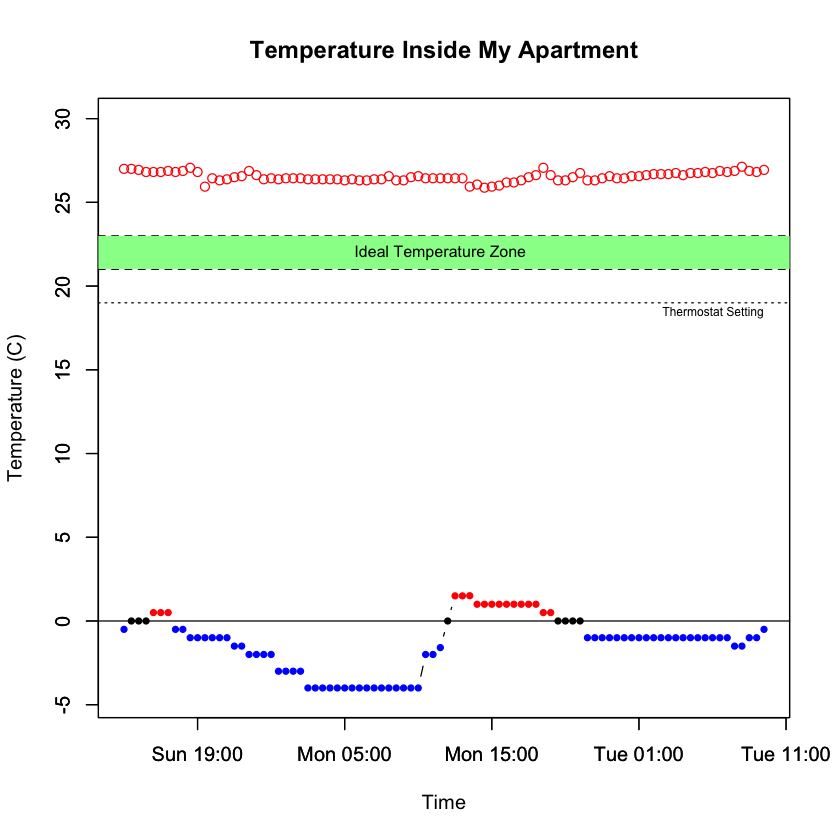

In [148]:
sampling_freq = 2 # In measurements/hour
sampling_range = 7 # In days
recent = sampling_freq * 24 * sampling_range

timespan = strptime(tail(DataFull$timestamp, recent), format="%c")
temp = tail(DataFull$temperature, recent)
ext_temp = tail(DataFull$external_temperature, recent)

TempFrame = data.frame(timespan,temp,ext_temp)

temp_range = get_ranges(TempFrame$temp,TempFrame$ext_temp)
ideal_range = c(21,23)

TempFrame$col = "green"
TempFrame$col[TempFrame$temp > ideal_range[2]] = "red"
TempFrame$col[TempFrame$temp < ideal_range[1]] = "blue"

TempFrame$ext_col = "black"
TempFrame$ext_col[TempFrame$ext_temp > 0] = "red"
TempFrame$ext_col[TempFrame$ext_temp < 0] = "blue"

plot(timespan, temp, ylim=temp_range, xlab="Time", ylab="Temperature (C)", main="Temperature Inside My Apartment", col=TempFrame$col)
lines(timespan, temp, type="c")

par(new=TRUE)
plot(timespan, ext_temp, ylim=temp_range, xlab="", ylab="", pch=20, col=TempFrame$ext_col)
lines(timespan, ext_temp, type="c")
abline(h=0, lty="solid")

thermostat = 19
abline(h=thermostat, lty="dotted")
text(timespan[length(timespan)],thermostat,adj=c(1,1.5),labels="Thermostat Setting", cex=0.6)

abline(h=ideal_range[1], lty="dashed")
abline(h=ideal_range[2], lty="dashed")
rect(0,ideal_range[1],timespan[length(timespan)]+ 1000000,ideal_range[2], col="palegreen", border=NA)
text(timespan[length(timespan)/2], 22, labels="Ideal Temperature Zone", cex=0.8)

In [149]:
DataFull <- read.csv(file="temperature_data.csv", header=TRUE, sep=",")

png("apartment_temperature.png")
sampling_freq = 2 # In measurements/hour
sampling_range = 7 # In days
recent = sampling_freq * 24 * sampling_range

# timespan = strptime(tail(DataFull$timestamp, recent), format="%c")
# temp = tail(DataFull$temperature, recent)
# ext_temp = tail(DataFull$external_temperature, recent)

# Data = data.frame(timespan,temp,ext_temp)
Data = data.frame(timespan = strptime(tail(DataFull$timestamp, recent), format="%c"),
temp = tail(DataFull$temperature, recent),
ext_temp = tail(DataFull$external_temperature, recent))

temp_range = get_ranges(Data$temp,Data$ext_temp)
ideal_range = c(21,23)

Data$col = "green"
Data$col[Data$temp > ideal_range[2]] = "red"
Data$col[Data$temp < ideal_range[1]] = "blue"

Data$ext_col = "black"
Data$ext_col[Data$ext_temp > 0] = "red"
Data$ext_col[Data$ext_temp < 0] = "blue"

plot(Data$timespan, Data$temp, ylim=temp_range, xlab="Time", ylab="Temperature (C)", main="Temperature Inside My Apartment", col=Data$col)
lines(Data$timespan, Data$temp, type="c")

par(new=TRUE)
plot(Data$timespan, Data$ext_temp, ylim=temp_range, xlab="", ylab="", pch=20, col=Data$ext_col)
lines(Data$timespan, Data$ext_temp, type="c")
abline(h=0, lty="solid")

thermostat = 19
abline(h=thermostat, lty="dotted")
text(Data$timespan[length(Data$timespan)],thermostat,adj=c(1,1.5),labels="Thermostat Setting", cex=0.6)

abline(h=ideal_range[1], lty="dashed")
abline(h=ideal_range[2], lty="dashed")
rect(0,ideal_range[1],Data$timespan[length(Data$timespan)]+ 1000000,ideal_range[2], col="palegreen", border=NA)
text(Data$timespan[length(Data$timespan)/2], 22, labels="Ideal Temperature Zone", cex=0.8)
dev.off()

pdf 
  2